- This notebook is to get the latent space of the binary mixture dataset for baseline fingerprint

In [2]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

from utils import *
from baseline import *

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from rdkit.DataStructs import ConvertToNumpyArray
import numpy as np

In [ ]:
df_mixture = pd.read_csv('../../data/Intermediate/df_mixture_20250502.csv')
df_mixture.head()

,smi1,conc1,smi2,conc2,miscibility
0,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,162.62807,CC(C)(C)CC(C)(C)C1=CC=C(C=C1)OCCO,236.877013,1
1,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,162.62807,[C@H]1([C@@H]([C@@H](OC([C@H]1O)C(=O)O)O[C@H]2...,44.593088,1
2,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,162.62807,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@@H]2[...,60.335465,1
3,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,162.62807,C1[C@@H]2[C@@H]([C@H](O1)[C@H]([C@H](O2)O)OS(=...,7.991050,1
4,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,162.62807,C1[C@@H]2[C@@H]([C@H](O1)[C@H]([C@H](O2)O)O)O[...,6.339546,1


In [4]:
conc_cols = [f'conc{i}' for i in range(1, 3)]
df_train = normalize_concentrations(df_mixture, conc_cols)

In [5]:
df_train

,smi1,conc1,smi2,conc2,miscibility
0,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,0.407074,CC(C)(C)CC(C)(C)C1=CC=C(C=C1)OCCO,0.592926,1
1,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,0.784804,[C@H]1([C@@H]([C@@H](OC([C@H]1O)C(=O)O)O[C@H]2...,0.215196,1
2,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,0.729393,C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O[C@@H]2[...,0.270607,1
3,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,0.953164,C1[C@@H]2[C@@H]([C@H](O1)[C@H]([C@H](O2)O)OS(=...,0.046836,1
4,C[C@H](CCC(=O)NCCC[N+](C)(C)CCCS(=O)(=O)[O-])[...,0.962481,C1[C@@H]2[C@@H]([C@H](O1)[C@H]([C@H](O2)O)O)O[...,0.037519,1
...,...,...,...,...,...
1373,C(C(=O)[O-])C(CC(=O)[O-])(C(=O)[O-])O.[Na+].[N...,0.453572,CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+],0.546428,1
1374,C(C(=O)[O-])C(CC(=O)[O-])(C(=O)[O-])O.[Na+].[N...,0.471851,[Na+].[Na+].[H]OP([O-])([O-])=O,0.528149,1
1375,C[C@H](CCC(=O)[O-])[C@H]1CC[C@@H]2[C@@]1([C@H]...,0.373527,CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+],0.626473,1
1376,C[C@H](CCC(=O)[O-])[C@H]1CC[C@@H]2[C@@]1([C@H]...,0.390888,[Na+].[Na+].[H]OP([O-])([O-])=O,0.609112,0


In [6]:
# Create separate fingerprint columns
df_train['fp1'] = df_train['smi1'].apply(smiles_to_fp)
df_train['fp2'] = df_train['smi2'].apply(smiles_to_fp)

In [7]:
X = build_feature_vector_bm(df_train, ['fp1', 'fp2'], ['conc1', 'conc2'])
y = df_train['miscibility'].values

In [23]:
feature_columns = [f'f_{i}' for i in range(X.shape[1])]

# Create DataFrame from features
df_combined = pd.DataFrame(X, columns=feature_columns)

# Add y as the last column
df_combined['miscibility'] = y
df_combined.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_2039,f_2040,f_2041,f_2042,f_2043,f_2044,f_2045,f_2046,f_2047,miscibility
0,0.000000,0.0,0.407074,0.0,0.0,0.000000,0.000000,0.407074,0.0,0.0,...,0.0,0.000000,0.407074,0.0,0.000000,0.0,0.0,0.407074,0.407074,1
1,0.215196,0.0,0.784804,0.0,0.0,0.215196,0.000000,0.784804,0.0,0.0,...,0.0,0.215196,0.784804,0.0,0.215196,0.0,0.0,0.784804,0.784804,1
2,0.270607,0.0,0.729393,0.0,0.0,0.270607,0.000000,0.729393,0.0,0.0,...,0.0,0.000000,0.729393,0.0,0.270607,0.0,0.0,0.729393,0.729393,1
3,0.046836,0.0,0.953164,0.0,0.0,0.046836,0.046836,1.000000,0.0,0.0,...,0.0,0.000000,0.953164,0.0,0.046836,0.0,0.0,1.000000,0.953164,1
4,0.037519,0.0,0.962481,0.0,0.0,0.037519,0.037519,1.000000,0.0,0.0,...,0.0,0.000000,0.962481,0.0,0.037519,0.0,0.0,0.962481,0.962481,1


In [25]:
df_combined.to_csv('df_combined_bm_baseline_20250527.csv', index=False)

/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

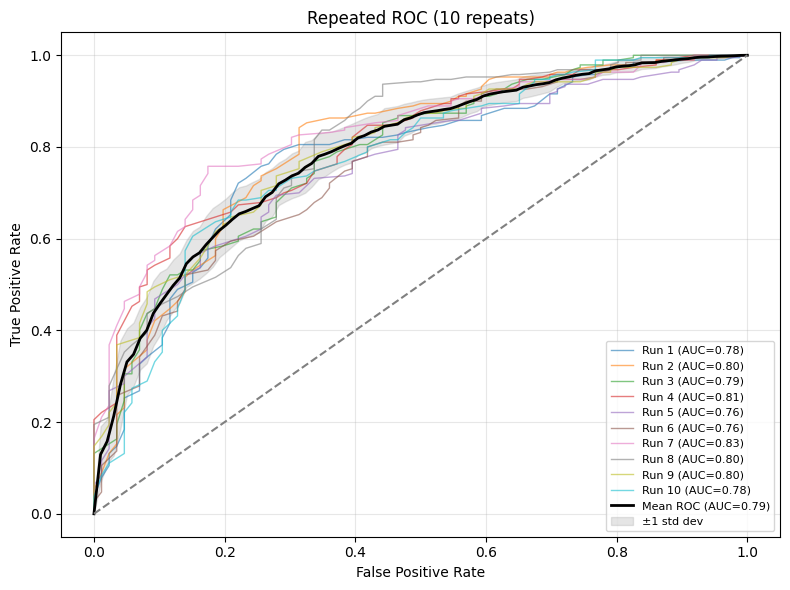

Mean AUC over 10 runs: 0.790 ± 0.021


In [4]:
evaluate_model_stability_baseline(df_combined, n_repeats=10)